In [1]:
# Flow for execution
# load file one by one until all complete (total 6 files for example)
# Intermediate result file generated as per yearly quarters
# once load complete for all file
# load intermediate result 1 to proceed further (4 intermediate files)
# analysis part see comments for details (used wolfsberg-principles)
# used aggregate and group by
# uploading the result table/dataframe below the generated data 
# (data already exists in intermediate result each summary/ reuslt added below it)
# open final result file Quarter<n> , <n> : 1, 2, 3, 4 
# complete similarly for all Quarter<n> files

In [2]:
# author : Wish mkn

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import pandasql as ps
import collections 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from csv import writer

import os
cwd = os.getcwd()

# print(cwd) get path of current dir where files stored as of now.
# for it to work store files in cwd 

In [3]:
root = cwd
path = os.path.join(root, "targetdirectory")
str1 = ".xlsx" 
name_xls = []
path_xls = []

# get path and existitng file names to work on
#
for path, subdirs, files in os.walk(root): # will get all file name ending with .csv
    for name in files:
        if(str1 in os.path.join(name)):
            name_xls.append(os.path.join(name))
            path_xls.append(os.path.join(path))

In [4]:
print(name_CSV) # see file position in list.

In [63]:
# STEP - 2
#
#
#


choice = int(input("Enter File Number Based on position in List : ")) 

# enter (number - 1) of file  you want to use if you want to choose eg. file 1 of 6 then enter 0
# dont select file names with result name and directly. As first it is required to generate them.

Enter File Number Based on position in List : 5


In [64]:
name_CSV[choice]  

#see name of selected file

'Q3_2021_2BANKXXXX_transactions_output.csv'

In [65]:
current_data = pd.read_csv(path_CSV[choice] + "\\" + name_CSV[choice]) 

#load only one file in memory Constraint

In [66]:
check = current_data['transaction_date']

In [67]:
current_data['check_date'] = check  # added duplicated column to use further

In [68]:
current_data['check_date'] = pd.DatetimeIndex(current_data.transaction_date).to_period("D")

# date change format to divide into 4 result files (4 quarters)

C:\Users\Wish\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [69]:
current_data['check_date'] = current_data['check_date'].dt.to_timestamp()

In [71]:
# check what is max date and min date. Created if statements based on this below.
print(current_data.check_date.min() , current_data.check_date.max())

2021-07-01 00:00:00 2021-07-30 00:00:00


In [72]:
# path to create new files for generating csv Result

path_Q1 = cwd + '\\Result\\Quarter1.csv'
path_Q2 = cwd + '\\Result\\Quarter2.csv'
path_Q3 = cwd + '\\Result\\Quarter3.csv'
path_Q4 = cwd + '\\Result\\Quarter4.csv'

path_res1 = Path(path_Q1)
path_res2 = Path(path_Q2)
path_res3 = Path(path_Q3)
path_res4 = Path(path_Q4)

In [73]:
# read the loaded file and then write content to appropriate quarter file based on dates

for i, j in current_data.iterrows():
    if ( j.values[-1] >= dt.date(2021,1,1) and j.values[-1] <= dt.date(2021,3,31)): #Q1
        if (os.path.isfile(path_Q1)):
            current_data.loc[[i]].to_csv(path_Q1, mode = 'a', index = False, header = False)
        else:
            current_data.loc[[i]].to_csv(path_Q1, index = False, header = True)
            
    if ( j.values[-1] >= dt.date(2021,4,1) and j.values[-1] <= dt.date(2021,6,30)): #Q2
        if (os.path.isfile(path_Q2)):
            current_data.loc[[i]].to_csv(path_Q2, mode = 'a', index = False, header = False)
        else:
            current_data.loc[[i]].to_csv(path_Q2, index = False, header = True)
            
    if ( j.values[-1] >= dt.date(2021,7,1) and j.values[-1] <= dt.date(2021,9,30)): #Q3
        if (os.path.isfile(path_Q3)):
            current_data.loc[[i]].to_csv(path_Q3, mode = 'a', index = False, header = False)
        else:
            current_data.loc[[i]].to_csv(path_Q3, index = False, header = True)
            
    if ( j.values[-1] >= dt.date(2021,10,1) and j.values[-1] <= dt.date(2021,12,31)): #Q4
        if (os.path.isfile(path_Q4)):
            current_data.loc[[i]].to_csv(path_Q4, mode = 'a', index = False, header = False)
        else:
            current_data.loc[[i]].to_csv(path_Q4, index = False, header = True)

In [ ]:
del current_data  

# removes the data frame after operation is complete. 
# so you can add new file in memory

In [ ]:
# ---- End of file generation As per each quarter... GO TO STEP 2 Till you finish uploading all files one by one.
# ---- Go to comment STEP 2 
# once all files are done with then proceed. 
# this finishes intermediate result generation
#

In [145]:
#
#
#


In [2]:
root_res = cwd
path_res = os.path.join(root_res, "targetdirectory")
str2 = "Quarter"
name_CSV_1 = []
path_CSV_1 = []

# get path and existitng file names to work on
#
for path, subdirs, files in os.walk(root_res):
    for name in files:
        if(str2 in os.path.join(name)):
            name_CSV_1.append(os.path.join(name))
            path_CSV_1.append(os.path.join(path))

In [3]:
name_CSV_1 # display csv files that have been added.

['Quarter1.csv', 'Quarter2.csv', 'Quarter3.csv']

In [4]:
# enter csv to load and use for analysis. eg: file pos 1, input  = 0 {zero in digit}

choice1 = int(input("Enter File Number Based on position in List : ")) 

# number to enter should be ( number - 1)

Enter File Number Based on position in List : 0


In [5]:
name_CSV_1[choice1]  # see selected file

'Quarter1.csv'

In [10]:
res_data = pd.read_csv(path_CSV_1[choice1] + "\\" + name_CSV_1[choice1]) #loading data [1 file at a time]

In [11]:
q2 = """
SELECT originator_full_name, beneficiary_full_name, originator_address, beneficiary_address, originator_account_number, beneficiary_account_number, originator_country, beneficiary_country, originator_bic, beneficiary_bic, SUM(converted_transaction_amount) as amount, converted_transaction_currency, transaction_id, check_date as transaction_date 
from res_data 
group by transaction_id
"""
# query to run and get those fields only

In [12]:
res_data1 = pd.DataFrame(ps.sqldf(q2,locals())) # run query to get 

del res_data # deleting after using


In [13]:
res_data1['transaction_date'] = pd.DatetimeIndex(res_data1.transaction_date).to_period("M") # date format change to use for 
                                                                                            # group by below.
res_data1['transaction_date'] = res_data1['transaction_date'].dt.to_timestamp()  

In [14]:
# Data for Selected File
quarter_sum = res_data1.groupby(res_data1['transaction_date'].dt.to_period("M"))['amount'].sum()
quarter_median = res_data1.groupby(res_data1['transaction_date'].dt.to_period("M"))['amount'].median()
quarter_min = res_data1.groupby(res_data1['transaction_date'].dt.to_period("M"))['amount'].min()
quarter_max = res_data1.groupby(res_data1['transaction_date'].dt.to_period("M"))['amount'].max()
# see sum of transactions for each month

print('SUM OF Quarter by month -- ',quarter_sum)
print('MEDIAN OF Quarter by month -- ',quarter_median)
print('MIN OF Quarter by month -- ',quarter_min)
print('MAX OF Quarter by month -- ',quarter_max)

# get idea of total sum of transaction in that month for the selected quarter file

SUM OF Quarter by month --  transaction_date
2021-01      302128.63
2021-02    91849270.57
2021-03      150734.99
Freq: M, Name: amount, dtype: float64
MEDIAN OF Quarter by month --  transaction_date
2021-01    27213.740
2021-02     1500.000
2021-03    19676.305
Freq: M, Name: amount, dtype: float64
MIN OF Quarter by month --  transaction_date
2021-01    1052.21
2021-02       0.16
2021-03     500.00
Freq: M, Name: amount, dtype: float64
MAX OF Quarter by month --  transaction_date
2021-01     241464.73
2021-02    8657828.00
2021-03     110882.38
Freq: M, Name: amount, dtype: float64


In [15]:
# Data for Selected File
quarter_count = res_data1.groupby([(pd.DatetimeIndex(res_data1.transaction_date).to_period("M"))]).count()  
#see count of each per month in quarter
quarter_count

# see how many missing values are present in each field to make further assumptions
# 

,originator_full_name,beneficiary_full_name,originator_address,beneficiary_address,originator_account_number,beneficiary_account_number,originator_country,beneficiary_country,originator_bic,beneficiary_bic,amount,converted_transaction_currency,transaction_id,transaction_date
transaction_date,,,,,,,,,,,,,,
2021-01,0,0,5,5,5,5,0,0,5,5,5,5,5,5
2021-02,998,998,1989,1989,991,991,0,0,1989,1989,1989,1989,1989,1989
2021-03,1,1,4,4,3,3,0,0,4,4,4,4,4,4


In [16]:
# freeing memory once the values are no longer required.

del quarter_count
del quarter_sum
del quarter_median
del quarter_min
del quarter_max

In [17]:
#
#  Metrics for risk assesment: Task 3
# 
# Transaction limit 10,000 per day
# unique customer sending round amounts.
# transaction just below daily limit
# details of full name , acc num, address and country are present
# country present or not in address or seprately to screen and monitor
# 
#
# 
#
#
#

In [18]:
res_data2 = res_data1
del res_data1    

# keeping 1 file in memory

In [66]:
# conditions set based on assumptions after reading the wolfsberg-principles pdf
# 

of_per = [] #originator full name analysis 

# if present and unique value = 0.6   
# if present and duplicate values = 0.2
# if no present = 0.5                 Full name essential

ofulname = res_data2['originator_full_name'].dropna() # just get all originators

origin_fulname_duplicates = [item for item, count in collections.Counter(ofulname).items() if count > 1]
# get customers who have made payments more than 1 time in this quarter

temp_fulname = res_data2.originator_full_name.fillna('empty_string') # generating calculatable valuse for originator full name

for i in range(0, len(temp_fulname)):
    if temp_fulname[i] == 'empty_string':
        of_per.append('0.5')
    if (temp_fulname[i] != 'empty_string' and temp_fulname[i]  not in str(origin_fulname_duplicates)):
        of_per.append('0.6')
    if temp_fulname[i] in str(origin_fulname_duplicates):
        of_per.append('0.2')
        
bf_per = [] #benificiary full name analysis

# if present and unique value = 0.6   
# if present and duplicate values = 0.2
# if no present = 0.5                  Full name essential

ofulname = res_data2['beneficiary_full_name'].dropna() # just get all originators

origin_fulname_duplicates = [item for item, count in collections.Counter(ofulname).items() if count > 1]
# get customers who have made payments more than 1 time in this quarter

temp_fulname = res_data2.originator_full_name.fillna('empty_string') # generating calculatable valuse for originator full name

for i in range(0, len(temp_fulname)):
    if temp_fulname[i] == 'empty_string':
        bf_per.append('0.5')
    if (temp_fulname[i] != 'empty_string' and temp_fulname[i]  not in str(origin_fulname_duplicates)):
        bf_per.append('0.6')
    if temp_fulname[i] in str(origin_fulname_duplicates):
        bf_per.append('0.2')

oa_per = [] # address analysis
ba_per = [] #

# if present and unique value : 0.75
# if present and duplicate value > 1 : 0.3  multiple times used address 
# if not present : 1   cant track address

oadrs = res_data2['originator_address'].dropna() # get all address of orgin and benifi
badrs = res_data2['beneficiary_address'].dropna() # 

oadrs_dup = [item for item, count in collections.Counter(oadrs).items() if count > 1] # get address repeated 
badrs_dup = [item for item, count in collections.Counter(badrs).items() if count > 1] # more than 1  

temp_oadrs = res_data2.originator_address.fillna('empty_string')  #fill blanks with empty string.
temp_badrs = res_data2.beneficiary_address.fillna('empty_string')

for i in range(0, len(temp_oadrs)):
    if temp_oadrs[i] == 'empty_string':
        oa_per.append('1')
    if ( temp_oadrs[i] != 'empty_string' and temp_oadrs[i] not in str(oadrs_dup)):
        oa_per.append('0.75')
    if temp_oadrs[i] in str(oadrs_dup):
        oa_per.append('0.3')

for i in range(0, len(temp_badrs)):
    if temp_badrs[i] == 'empty_string':
        ba_per.append('1')
    if ( temp_badrs[i] != 'empty_string' and temp_badrs[i] not in str(badrs_dup)):
        ba_per.append('0.75')
    if temp_badrs[i] in str(oadrs_dup):
        ba_per.append('0.3')


oacn_per = [] # acc num analysis
bacn_per = [] # 

# if present and unique : 0.2        # unique ac nos : since every one gets unique acc numbers
# if present and more than 1 duplicate : 0.5   #frequent ac nos used, who does more transactions
# if not presenet : 1      # no account number where then?

oacn = res_data2['originator_account_number'].dropna() # get all acc numbers
bacn = res_data2['beneficiary_account_number'].dropna()

oacn_dup = [item for item, count in collections.Counter(oacn).items() if count > 1] # get acc number repeated more than 1 times
bacn_dup = [item for item, count in collections.Counter(bacn).items() if count > 1]

temp_oacn = res_data2.originator_account_number.fillna('empty_string') # fill empty with empty_string
temp_bacn = res_data2.originator_account_number.fillna('empty_string')

for i in range(0, len(temp_oacn)):
    if temp_oacn[i] == 'empty_string':
        oacn_per.append('1')
    if ( temp_oacn[i] != 'empty_string' and temp_oacn[i] not in oacn_dup):
        oacn_per.append('0.2')
    if temp_oacn[i] in oacn_dup:
        oacn_per.append('0.5')
        
for i in range(0, len(temp_bacn)):
    if temp_bacn[i] == 'empty_string':
        bacn_per.append('1')
    if ( temp_bacn[i] != 'empty_string' and temp_bacn[i] not in bacn_dup):
        bacn_per.append('0.2')
    if temp_bacn[i] in bacn_dup:
        bacn_per.append('0.5')
        
octry_per = [] # country analysis
bctry_per = []

#
# if present : 0 safe to screen from which to which country money goes
# if not present : 1 to screen and monitor Flag 

octry = res_data2['originator_country'].dropna() # get all acc numbers
bctry = res_data2['beneficiary_country'].dropna() 

temp_octry = res_data2.originator_country.fillna('empty_string')
temp_bctry = res_data2.beneficiary_country.fillna('empty_string')

for i in range ( 0, len(temp_octry)):
    if temp_octry[i] == 'empty_string':
        octry_per.append('1')
    if temp_octry[i] in octry:
        octry_per.append('0')

for i in range ( 0, len(temp_bctry)):
    if temp_bctry[i] == 'empty_string':
        bctry_per.append('1')
    if temp_bctry[i] in bctry:
        bctry_per.append('0')
        
obic_per = []  # BIC analysis
bbic_per = []

# if present 0
# if not then 1   as if customer name and is not present then bic gives info abt name and adress as per Wolfe.. pdf

obic = res_data2['originator_bic'].dropna() # get all acc numbers
bbic = res_data2['beneficiary_bic'].dropna() 

temp_obic = res_data2.originator_bic.fillna('empty_string')
temp_bbic = res_data2.beneficiary_bic.fillna('empty_string')

for i in range ( 0, len(temp_obic)):
    if temp_obic[i] == 'empty_string':
        obic_per.append('1')
    if temp_obic[i] in str(obic):
        obic_per.append('0')

for i in range ( 0, len(temp_bbic)):
    if temp_bbic[i] == 'empty_string':
        bbic_per.append('1')
    if temp_bbic[i] in str(bbic):
        bbic_per.append('0')

amt_per = [] # amount analysis

# floating amount number not near to daily threshold above or below or not too huge :  0.1 
# rounded figure (in multiples of 10 )  :  0.85
# transaction just below daily limit (set = 10,000 EUR threshold -1000):  0.9
# huge money transfer of unreasonable amount : 0.8   eg: 10000000 and more

amt = res_data2['amount'].dropna() # get all amount values

temp_amt = res_data2.amount.fillna('empty_string') # fill if no amount was transferred.

for i in range(0, len(temp_amt)):
    if (type(temp_amt[i]) == int) and (temp_amt[i]%10 == 0):
        amt_per.append('0.9')
    if ( type(temp_amt[i]) != int) and (temp_amt[i] >= 9000 and temp_amt[i]<= 10000):
        amt_per.append('0.9')
    if (type(temp_amt[i]) != int ) and (temp_amt[i] < 9000) or (temp_amt[i] > 10000 and temp_amt[i] <= 10000000 ):
        amt_per.append('0.1')
    if (type(temp_amt[i]) != int ) and temp_amt[i] > 10000000 :
        amt_per.append('0.8')

        
tid_per = [] # transaction id analysis

# if exist 0
# if not exist 0.3  : 

temp_tid = res_data2.transaction_id.fillna('empty_string') 

for i in range( 0, len(temp_tid)):
    if temp_tid[i] == 'empty_string':
        tid_per.append('0.3')
    else:
        tid_per.append('0')

tdt_per = [] # transac dates

# if multipe same days transaction then 0.3 #many transact in one day
# if unique day transaction then 0.3  only one transact on that day
# if absent then : 0.6  if date is absent
#

tdt = res_data2['transaction_date'].dropna() #get all dates

temp_tdt = res_data2.transaction_date.fillna('empty_string') #get all values including blank date if any

tdt_dup = [item for item, count in collections.Counter(tdt).items() if count > 5] 
# similar days greater than 5 to see how many
# transaction in that day.

for i in range(0, len(temp_tdt)):
    if temp_tdt[i] == 'empty_string':
        tdt_per.append('0.6')
    if ( temp_tdt[i] != 'empty_string' and temp_tdt[i] not in tdt_dup):
        tdt_per.append('0.3')
    if temp_tdt[i] in tdt_dup:
        tdt_per.append('0.3')

In [67]:
# creating dataframe based on analysis results.

analysis_list = {'o_name':of_per ,'b_name': bf_per,'o_a':oa_per ,'b_a':ba_per ,'o_acn': oacn_per,
                 'b_acn': bacn_per ,'o_ctry': octry_per,'b_ctry':bctry_per ,'o_bic': obic_per,'b_bic': bbic_per,
                 'amt': amt_per,'t_id': tid_per ,'t_dt': tdt_per}

data_frame_analysis = pd.DataFrame(analysis_list)

data_frame_analysis = data_frame_analysis.apply(pd.to_numeric)  
# will help to calc the t_risk column for orgini and benificary 
#to calc perfomance for the bic for the quarter. 

In [70]:
data_frame_analysis['t_risk'] = ((data_frame_analysis.o_name + data_frame_analysis.b_name + data_frame_analysis.o_a +
                                data_frame_analysis.b_a + data_frame_analysis.o_acn + data_frame_analysis.b_acn +
                                data_frame_analysis.o_ctry + data_frame_analysis.b_ctry + data_frame_analysis.o_bic +
                                data_frame_analysis.b_bic + data_frame_analysis.amt)/11 )

# total risk factor 0 - 1  

data_frame_analysis['ot_risk'] = ((data_frame_analysis.o_name + data_frame_analysis.o_a +
                                  data_frame_analysis.o_ctry + data_frame_analysis.o_acn +
                                  data_frame_analysis.amt + data_frame_analysis.o_bic
                                  ) / 6)

# originator risk factor

data_frame_analysis['bt_risk'] = ((data_frame_analysis.b_name + data_frame_analysis.b_a +
                                  data_frame_analysis.b_ctry + data_frame_analysis.b_acn +
                                  data_frame_analysis.amt + data_frame_analysis.b_bic
                                  ) / 6)
# benificary risk factor

#generating factor of possible risk or not. (can also change it but for simplicity using this for now)

data_frame_analysis['t_label'] = round(data_frame_analysis.t_risk,0)
# making a metric column that can help in perfomance calculation, predection, etc

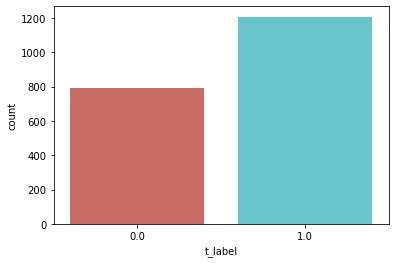

In [71]:
sns.countplot(x = 't_label', data = data_frame_analysis, palette = 'hls' )
plt.show()

# see how the label field generated is doing.
# 1 has something wrong in transaction
# 0 okay ish transactions.

In [72]:
# proceeding with perfomance and ranking.
# make query for bank3xxx and bank4xxx to generate their respective ranks
#  
# 
# 
# 

o_bic_per = round((data_frame_analysis['ot_risk'].sum())/ len(data_frame_analysis.ot_risk),3) * 100

b_bic_per = round((data_frame_analysis['bt_risk'].sum())/ len(data_frame_analysis.bt_risk),3) * 100

print(' bic perfomance for selected quarter is --- originator bic perfomance = ', 
      round(o_bic_per,2),'%', '  --- benificiary bic perf = ',round(b_bic_per,2),'%')

# see for given quarter which bic perfomance was better
# ranking the 2 bics that were there
# which ever is less is better.

 bic perfomance for selected quarter is --- originator bic perfomance =  51.8 %   --- benificiary bic perf =  51.0 %


In [73]:
# get monthly perfomance of originator and benificary, bics

res_data2['t_risk'] = data_frame_analysis.t_risk
res_data2['ot_risk'] = data_frame_analysis.ot_risk
res_data2['bt_risk'] = data_frame_analysis.bt_risk

perf_bic_monthly = round(res_data2.groupby([(pd.DatetimeIndex(res_data2.transaction_date).to_period("M"))]).sum()/len(res_data2.ot_risk) *100,3)

#

In [74]:
columns1 = ['originator_account_number', 'beneficiary_account_number', 'amount','transaction_id']
perf_bic_monthly.drop(columns1, inplace=True, axis=1)

In [75]:
# combining to view data comfortable. 
# 
quarter_count = res_data2.groupby([(pd.DatetimeIndex(res_data2.transaction_date).to_period("M"))]).count()  
#
perf_bic_monthly['count_o_name'] = quarter_count.originator_full_name
perf_bic_monthly['count_b_name'] = quarter_count.beneficiary_full_name
perf_bic_monthly['count_o_adr'] = quarter_count.originator_address
perf_bic_monthly['count_b_adr'] = quarter_count.beneficiary_address
perf_bic_monthly['count_o_acn'] = quarter_count.originator_account_number
perf_bic_monthly['count_b_acn'] = quarter_count.beneficiary_account_number
perf_bic_monthly['count_o_ctry'] = quarter_count.originator_country
perf_bic_monthly['count_b_ctry'] = quarter_count.beneficiary_country
temp_gen_data = res_data2.groupby([(pd.DatetimeIndex(res_data2.transaction_date).to_period("M"))]).sum()
perf_bic_monthly['sum_amt'] = temp_gen_data.amount

In [76]:
del quarter_count
# free memory

In [ ]:
# 
# Yearly result divided
# transactionon_date : YEAR and MONTH 
# ot_risk : originator transaction risk in %
# bt_risk : benificiary transaction risk in %
# t_risk : overall transaction risk in %
# count_o_name : number of originator in particular file
# count_b_name : number of benificiary in particular file
# count_o_adr : number of originator address in particular file
# count_b_adr : number of benificiary address in particular file
# count_o_acn : number of originator account number in particular file
# count_b_acn : number of benificiary account number in particular file
# count_o_ctry : number of originator country in particular file
# count_b_ctry : number of benificiary country in particular file
# sum_amt : total amount transaction done
# 

In [77]:
perf_bic_monthly  # see generated result. Task 1 and 2 ot_risk and bt_risk in percentage values (lower the better.)

,ot_risk,bt_risk,t_risk,count_o_name,count_b_name,count_o_adr,count_b_adr,count_o_acn,count_b_acn,count_o_ctry,count_b_ctry,sum_amt
transaction_date,,,,,,,,,,,,
2021-01,0.116,0.114,0.123,0,0,5,5,5,5,0,0,302128.63
2021-02,51.543,50.765,54.783,998,998,1989,1989,991,991,0,0,91849270.57
2021-03,0.098,0.095,0.103,1,1,4,4,3,3,0,0,150734.99


In [183]:
path_result = path_CSV_1[choice1] + "\\" + name_CSV_1[choice1]

blank_1 = ['  '] # create space before we put result in the file for selected quarter

with open(path_result, 'a') as f_object: 
    writer_object = writer(f_object)
    for i in range (0, 3):
        writer_object.writerow(blank_1)
    f_object.close()

In [184]:
perf_bic_monthly.to_csv(path_result, mode = 'a', index = True, header = True) # Task 3 over

In [185]:
del res_data2
# del data_frame_analysis   # can keep for further use or can delete it

In [ ]:
# possible next month risk for bic calculation.
# used moving average here as its simple.
# bonus part 1 
# 
# 

obic_next_month_perf = perf_bic_monthly.ot_risk.mean() #originating bic perf
bbic_next_month_perf = perf_bic_monthly.bt_risk.mean() # benificiary bic perf
t_bic_risk_next_month_perf = perf_bic_monthly.t_risk.mean() # total of both  origin or benificary

print(' Next month possible bic perfomance')
print(' Origin_BIC : - ',round(obic_next_month_perf,2),'%')
print(' Benific_BIC : - ',round(bbic_next_month_perf,2),'%')
print(' Total_BIC : - ',round(t_bic_risk_next_month_perf,2),'%')

In [186]:
# model generation to check metrics set 
# will vary depending on what we have set in metrics

feature_cols = ['o_name','b_name','o_a','b_a','o_acn','b_acn','o_ctry','b_ctry','amt','o_bic','b_bic','t_id','t_dt']

X = data_frame_analysis[feature_cols] # assigining feature values
Y = data_frame_analysis.t_label

X_train,X_test,Y_train,Y_test = train_test_split(X , Y, test_size=0.30,random_state=0) # divide in train:test , 70:30

logreg = LogisticRegression()  # model logreg created

logreg.fit(X_train,Y_train) # fit model with data

LogisticRegression()

In [187]:
Y_pred = logreg.predict(X_test) # 
# Y_probas = logreg.predict_proba(X_test) #
# Y_pred = [1 if i > 0.65 else 0 for i in Y_probas] #

In [188]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred) # confusion matrix
cnf_matrix

array([[224,   0],
       [  2, 374]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

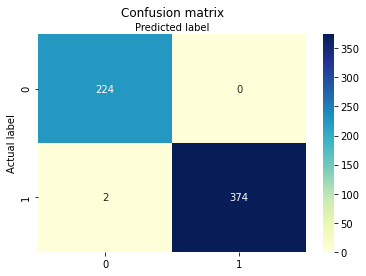

In [189]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap to see perfomance of model

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

# we get this because of practice data and whatever conditions we have set.

Accuracy: 0.9966666666666667
Precision: 1.0
Recall: 0.9946808510638298


In [179]:
import gc
gc.collect()